# brmspy - google colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1uq6S3exG1zy-JX1lD69ehG4ZHOu9eXY6)

In [1]:
import sys, os # for running from repo
sys.path.insert(0, os.path.abspath("../../"))

try: from brmspy import brms
except ImportError:
    %pip install -q brmspy
    from brmspy import brms

[brmspy][_call_with_frames_removed] Running autoload!
[brmspy][_autoload] Activating runtime /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0
[brmspy][_autoload] lib paths are ['/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/library', '/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/Rlib']
[brmspy][_autoload] Setting cmdstan path to /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/cmdstan


In [2]:
with brms.manage() as ctx:
    ctx.install_brms(use_prebuilt=True)

[brmspy][install_brms] Activating runtime /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0
[brmspy][install_brms] lib paths are ['/Users/sebastian/.brmspy/environment/default/Rlib', '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/library', '/Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/Rlib']
[brmspy][install_brms] Setting cmdstan path to /Users/sebastian/.brmspy/runtime/macos-arm64-r4.5-0.2.0/cmdstan


In [3]:
epilepsy = brms.get_brms_data("epilepsy")
formula = "count ~ zAge + zBase * Trt + (1|patient)"
family = "poisson"
brms.default_prior(formula, data=epilepsy, family=family)

,prior,class,coef,group,resp,dpar,nlpar,lb,ub,tag,source
1,,b,,,,,,,,,default
2,,b,Trt1,,,,,,,,default
3,,b,zAge,,,,,,,,default
4,,b,zBase,,,,,,,,default
5,,b,zBase:Trt1,,,,,,,,default
6,"student_t(3, 1.4, 2.5)",Intercept,,,,,,,,,default
7,"student_t(3, 0, 2.5)",sd,,,,,,0,,,default
8,,sd,,patient,,,,,,,default
9,,sd,Intercept,patient,,,,,,,default


In [4]:
model = brms.brm(
    formula=formula,
    data=epilepsy,
    family=family,
    warmup=500,
    iter=1000,
    chains=4
)
idata = model.idata

[brmspy][worker_main] Fitting model with brms (backend: cmdstanr)...
Running MCMC with 4 chains, at most 2 in parallel...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
C

In [5]:
brms.save_rds(model, "epilepsy_fixed_effects.rds")
# load later using: model = brms.load_rds_fit("epilepsy_fixed_effects.rds")

In [6]:
epilepsy

,Age,Base,Trt,patient,visit,count,obs,zAge,zBase
1,31.0,11.0,0,1,1,5.0,1,0.424995,-0.757173
2,30.0,11.0,0,2,1,3.0,2,0.265284,-0.757173
3,25.0,6.0,0,3,1,2.0,3,-0.533274,-0.944403
4,36.0,8.0,0,4,1,4.0,4,1.223553,-0.869511
5,22.0,66.0,0,5,1,7.0,5,-1.012408,1.302363
...,...,...,...,...,...,...,...,...,...
232,32.0,16.0,1,55,4,3.0,232,0.584707,-0.569942
233,26.0,22.0,1,56,4,8.0,233,-0.373562,-0.345266
234,21.0,25.0,1,57,4,1.0,234,-1.172120,-0.232927
235,36.0,13.0,1,58,4,0.0,235,1.223553,-0.682281


In [7]:
c = brms.call("as.data.frame", epilepsy)
c

,Age,Base,Trt,patient,visit,count,obs,zAge,zBase
_obs_id_,,,,,,,,,
1,31.0,11.0,0,1,1,5.0,1,0.424995,-0.757173
2,30.0,11.0,0,2,1,3.0,2,0.265284,-0.757173
3,25.0,6.0,0,3,1,2.0,3,-0.533274,-0.944403
4,36.0,8.0,0,4,1,4.0,4,1.223553,-0.869511
5,22.0,66.0,0,5,1,7.0,5,-1.012408,1.302363
...,...,...,...,...,...,...,...,...,...
232,32.0,16.0,1,55,4,3.0,232,0.584707,-0.569942
233,26.0,22.0,1,56,4,8.0,233,-0.373562,-0.345266
234,21.0,25.0,1,57,4,1.0,234,-1.172120,-0.232927


In [8]:
import arviz as az
summary = az.summary(
    idata,
    hdi_prob=0.95,
    kind="stats",
    round_to=3
)

print("Posterior Summary")
print("="*60)
print(summary)

Posterior Summary
                            mean     sd  hdi_2.5%  hdi_97.5%
b_Intercept                1.775  0.115     1.573      2.009
b_zAge                     0.089  0.085    -0.076      0.254
b_zBase                    0.702  0.119     0.447      0.921
b_Trt1                    -0.264  0.166    -0.590      0.052
b_zBase:Trt1               0.047  0.166    -0.257      0.385
...                          ...    ...       ...        ...
r_patient[57,Intercept]   -0.610  0.331    -1.289      0.011
r_patient[58,Intercept]   -1.233  0.423    -2.032     -0.378
r_patient[59,Intercept]   -0.170  0.296    -0.751      0.399
lprior                    -3.184  0.009    -3.202     -3.167
lp__                    -701.308  7.887  -716.139   -686.145

[68 rows x 4 columns]


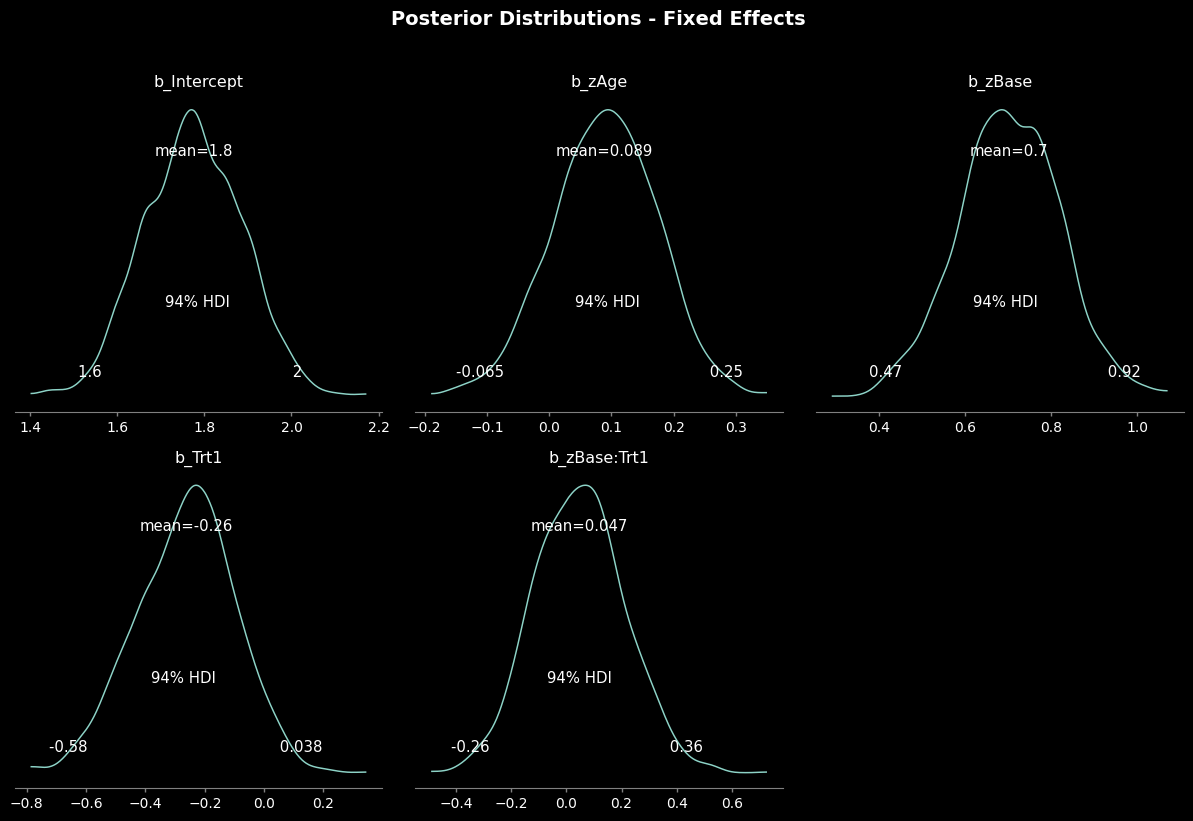

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = az.plot_posterior(
    idata,
    var_names=['b_Intercept', 'b_zAge', 'b_zBase', 'b_Trt1', 'b_zBase:Trt1'],
    figsize=(12, 8),
    textsize=10
)
plt.suptitle('Posterior Distributions - Fixed Effects', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
